In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import UnicycleModel
import UnicycleCost
import UnicycleConstraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [3]:
ix = 3
iu = 2
ih = 2
N = 100
delT = 0.1
max_iter = 30

In [11]:
xi = np.zeros(3)
xi[0] = -2.0
xi[1] = -2.0 
xi[2] = 0

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0

myModel = UnicycleModel.unicycle('Hello',ix,iu,delT)
myCost = UnicycleCost.unicycle('Hello',ix,iu,N)
myConst = UnicycleConstraints.UnicycleConstraints('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N+1,iu))

In [19]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst,type_discretization="zoh",w_vc=1e4,w_tr=1e-3)
x,u,xbar,ubar,num_iter = i1.update(x0,u0)

iteration   total_cost  cost        ||vc||     ||tr||       reduction   expected    w_tr        bounary
0           0           0           0           0           -4.01e+04   -4.01e+04   0.0         0( 4)
1           4.01e+04    80          4e+04       0.00163     3.99e+04    3.99e+04    0.0         0(2.28)
non-positive expected reduction
2           140         140         3.28e-08    0.0149      -36.9       -36.9       0.0         0(1.38)
non-positive expected reduction
3           177         177         3.95e-08    0.00534     -15         -15         0.0         0(0.325)
non-positive expected reduction
4           192         192         1.55e-07    0.00393     -15.9       -15.9       0.0         0(0.0483)
non-positive expected reduction
5           208         208         8.12e-08    0.000333    -0.862      -0.862      0.0         0(0.0151)
non-positive expected reduction
6           209         209         1.26e-06    7.15e-05    -0.369      -0.369      0.0         0(0.00474)
no

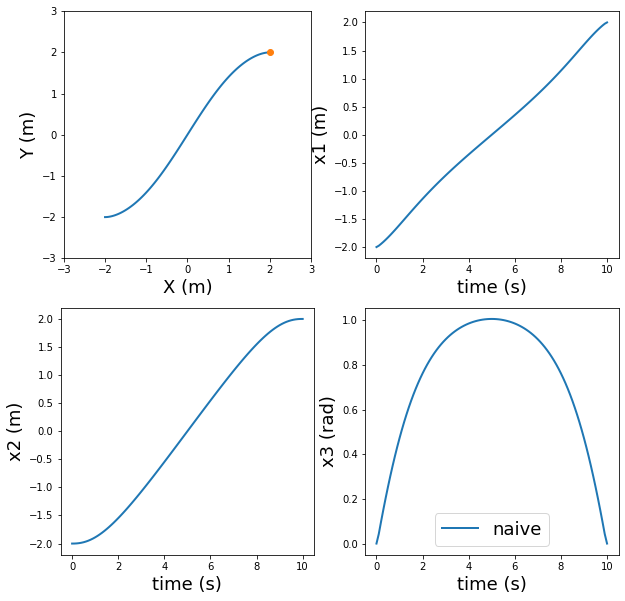

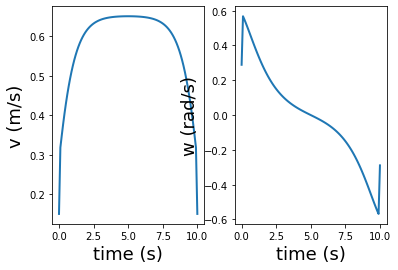

In [18]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N+1))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N+1))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

In [ ]:
from matplotlib.patches import Rectangle
import imageio
import os

In [ ]:
filenames = []
for i in range(N+1) :
    fS = 18
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(x[:i+1,0], x[:i+1,1], linewidth=2.0) 
    plt.plot(xf[0], xf[1],'*', linewidth=2.0)
    plt.plot(x[i,0], x[i,1],'*', linewidth=2.0) 
    plt.plot(x[i,0], x[i,1], marker=(3, 0, x[i,2]*180/np.pi-90), markersize=20, linestyle='None')
#     ax.add_patch(rec)
    plt.axis([-3, 3, -3, 3])
    plt.xlabel('X (m)', fontsize = fS)
    plt.ylabel('Y (m)', fontsize = fS)

    filename = '../images/{:d}.png'.format(i)
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

In [ ]:
with imageio.get_writer('../images/unicycle.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
for filename in set(filenames):
    os.remove(filename)